# <a id='toc1_'></a>[PCE: AlGORITHME DE SCHARBER ](#toc0_)

1. **MVOTO KONGO Patrick Sorrel**, sorrel.mvoto@facsciences-uy1.cm
    * Department of Physics, Faculty of Science, University of Yaounde I 
Etudiant de Master au Laboratoire de 
    * Physique Atomique Moleculaire et Biophysique

Janvier 2024

In [1]:
#importation des packages  rdkit
from rdkit import Chem

In [2]:
smile ='c1ccccc1'

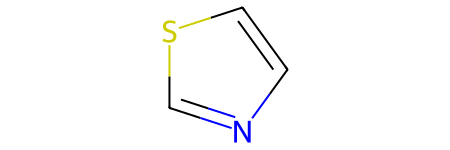

In [3]:

#  Convertir le SMILES en objet RDKit Mol
smiles = "C1=CSC=N1"#https://pubchem.ncbi.nlm.nih.gov/compound/Thiazole
mol = Chem.MolFromSmiles(smiles)
mol

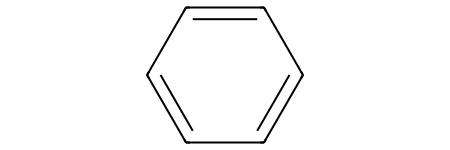

In [4]:
mol1 = Chem.MolFromSmiles(smile)
mol1

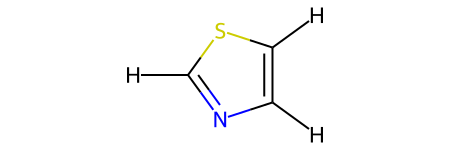

In [5]:

mol = Chem.AddHs(mol)
mol

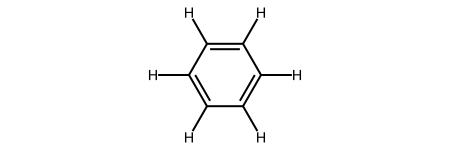

In [6]:
mol1 = Chem.AddHs(mol1)
mol1

In [7]:
#observer le nombres d'atomes de mon objet mol 
mol.GetNumAtoms()

8

In [8]:
#observer le nombres d'atomes de mon objet mol 
mol1.GetNumAtoms()

12

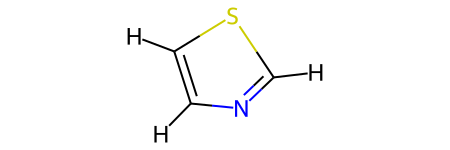

In [9]:
from rdkit.Chem import  AllChem
confid = AllChem.EmbedMolecule(mol)
mol

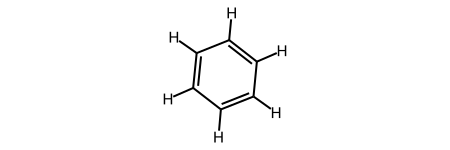

In [10]:

confid = AllChem.EmbedMolecule(mol1)
mol1


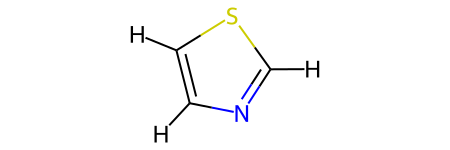

In [11]:
AllChem.UFFOptimizeMolecule(mol)
mol

In [12]:
for i, atom in enumerate(mol.GetAtoms()):
        positions = mol.GetConformer().GetAtomPosition(i)
        print(atom.GetSymbol(), positions.x, positions.y, positions.z)

C -0.6491093601269846 -0.7509542454920527 0.011544518904899362
C -0.9876983948713984 0.5959729201681198 0.024191890481892724
S 0.42995939929929855 1.475850502068132 0.22418310986670478
C 1.4103775995127819 0.11280857266606842 0.2859861766860487
N 0.6773641676541661 -1.014156299545265 0.15650975641278797
H -1.380324948157459 -1.5394393715240071 -0.10460299553272669
H -1.9849607396769269 1.002212508603418 -0.0767300029956962
H 2.484392276366539 0.11770541305565448 0.4118010611362812


In [13]:
for i, atom in enumerate(mol1.GetAtoms()):
        positions = mol1.GetConformer().GetAtomPosition(i)
        print(atom.GetSymbol(), positions.x, positions.y, positions.z)

C -0.16348519699801062 -1.358497164253339 0.0641949862816682
C 1.1196688792152802 -0.851313001935487 0.04788232125484645
C 1.2517879776113987 0.5189555873743482 -0.017073813049837846
C 0.1621225318547365 1.366916204912346 -0.06460578613000513
C -1.1153740276755655 0.8564513873245491 -0.04809966968639838
C -1.2538516436248683 -0.5155943612644475 0.016902804970658544
H -0.2574594293534942 -2.4475111810908934 0.11588072682249154
H 2.0074020939460904 -1.4868643628980993 0.08394928795588132
H 2.2414337359172323 0.9480544827483011 -0.03148473738785367
H 0.2636158775279534 2.4362890640287596 -0.1153069720728836
H -2.0110516954737485 1.4814418022016842 -0.08370992006502297
H -2.2448091029470043 -0.9483284571477033 0.031470771106461355


## OPTIMIZE THE MOLECULE USING XTB ( or other semiempirical methods)

In [14]:
from ase.build import molecule
from xtb.ase.calculator import XTB

In [15]:
mol.pbc=False
#newstrxtb.calc=XTB(method="GFN2-xTB")
# GFNFF is very fast. See here for other methods:
# https://xtb-python.readthedocs.io/en/latest/general-api.html#available-calculation-methods
mol.calc=XTB(method="GFNFF")

In [16]:
mol1.pbc=False
#newstrxtb.calc=XTB(method="GFN2-xTB")
# GFNFF is very fast. See here for other methods:
# https://xtb-python.readthedocs.io/en/latest/general-api.html#available-calculation-methods
mol1.calc=XTB(method="GFNFF")

In [17]:
mol_xyz = Chem.MolToXYZBlock(mol)

# supression de la premiere liugne (numbre d atomes) pour les donnees XYZ 
mol_xyz = '\n'.join(mol_xyz.strip().split('\n')[1:])

In [18]:
mol_xyz1 = Chem.MolToXYZBlock(mol1)

# supression de la premiere liugne (numbre d atomes) pour les donnees XYZ 
mol_xyz1 = '\n'.join(mol_xyz1.strip().split('\n')[1:])

In [19]:
from pyscf import gto
mol = gto.Mole(
    atom=mol_xyz,
    charge=0,
    spin = 0,  # 2j == nelec_alpha - nelec_beta
    basis = 'cc-pVDZ',
    symmetry = True, # Allow the program to apply point group symmetry if possible
    unit = 'Angstrom',
    )
mol.build()

In [20]:
from pyscf import gto
mol1 = gto.Mole(
    atom=mol_xyz1,
    charge=0,
    spin = 0,  # 2j == nelec_alpha - nelec_beta
    basis = 'cc-pVDZ',
    symmetry = True, # Allow the program to apply point group symmetry if possible
    unit = 'Angstrom',
    )
mol1.build()

In [21]:
print(f'Le nombre total d\'électrons est {mol.nelectron} et le nombre total d\'électrons (alpha, béta) est {mol.nelec}')
print(f'Le nombre d\'orbitales atomiques, dans la base {mol.basis}, est {mol.nao_nr()}')
print(f'L\'énergie nucléaire vaut {mol.energy_nuc()} Hartrees')

Le nombre total d'électrons est 44 et le nombre total d'électrons (alpha, béta) est (22, 22)
Le nombre d'orbitales atomiques, dans la base cc-pVDZ, est 89
L'énergie nucléaire vaut 206.59453232010438 Hartrees


In [22]:
print(f'Le nombre total d\'électrons est {mol1.nelectron} et le nombre total d\'électrons (alpha, béta) est {mol1.nelec}')
print(f'Le nombre d\'orbitales atomiques, dans la base {mol1.basis}, est {mol1.nao_nr()}')
print(f'L\'énergie nucléaire vaut {mol1.energy_nuc()} Hartrees')

Le nombre total d'électrons est 42 et le nombre total d'électrons (alpha, béta) est (21, 21)
Le nombre d'orbitales atomiques, dans la base cc-pVDZ, est 114
L'énergie nucléaire vaut 205.438445781051 Hartrees


In [23]:
import numpy as np

In [25]:
from pyscf import dft,scf
import time
start = time.time()
mdf=dft.RKS(mol, xc="B3LYP").run()
mdf_time = time.time() - start

converged SCF energy = -569.069362597561


In [26]:
start = time.time()
mdf1=dft.RKS(mol1, xc="B3LYP").run()
mdf1_time = time.time() - start

converged SCF energy = -232.258034469416


In [27]:
start = time.time()
myhf = scf.RHF(mol).run()
myhf_time = time.time() - start 

converged SCF energy = -567.310342557446


In [28]:
start = time.time()
myhf1 = scf.RHF(mol1).run()
myhf1_time = time.time() - start 

converged SCF energy = -230.718924694492


In [29]:
def find_homo_lumo(mf_pyscf, au2ev):
    """Function that returns the HOMO and LUMO index and the gap energy in eV

    Args:
        mf_pyscf (pyscf object): pyscf meam-field object of the molecule to be evaluated.
    """
    # Index of HOMO and LUMO
    lumo_idx = mf_pyscf.mo_occ.tolist().index(0.)
    homo_idx = lumo_idx - 1

    # Calculate the gap Homo-LUMO
    E_HOMO = mf_pyscf.mo_energy[homo_idx]*au2ev
    E_LUMO = mf_pyscf.mo_energy[lumo_idx]*au2ev
    E_g = abs(E_HOMO - E_LUMO)

    return E_HOMO, E_LUMO, E_g

In [30]:
from pyscf.data import nist
#conversion en eV
au2ev = nist.HARTREE2EV

In [31]:
print(f"DFT Energy: {mdf.e_tot} Hartree\n")
print(f"Dipole Moment: {mdf.dip_moment()}\n")
print(f"Mulliken Charges: {mdf.mulliken_pop()}\n")

DFT Energy: -569.069362597561 Hartree

Dipole moment(X, Y, Z, Debye): -0.67323,  1.37697, -0.02537
Dipole Moment: [-0.67322966  1.37697119 -0.02537426]

 ** Mulliken pop  **
pop of  0 C 1s            2.01244
pop of  0 C 2s            0.68058
pop of  0 C 3s            0.38116
pop of  0 C 2px           0.71843
pop of  0 C 2py           0.75337
pop of  0 C 2pz           0.60320
pop of  0 C 3px           0.14160
pop of  0 C 3py           0.10686
pop of  0 C 3pz           0.39108
pop of  0 C 3dxy          0.03789
pop of  0 C 3dyz          0.01015
pop of  0 C 3dz^2         0.00469
pop of  0 C 3dxz          0.01461
pop of  0 C 3dx2-y2       0.02683
pop of  1 C 1s            2.01271
pop of  1 C 2s            0.68111
pop of  1 C 3s            0.49605
pop of  1 C 2px           0.70829
pop of  1 C 2py           0.73757
pop of  1 C 2pz           0.63873
pop of  1 C 3px           0.14027
pop of  1 C 3py           0.20073
pop of  1 C 3pz           0.46824
pop of  1 C 3dxy          0.02092
pop of  1 

In [32]:
print(f"DFT Energy: {mdf1.e_tot} Hartree\n")
print(f"Dipole Moment: {mdf1.dip_moment()}\n")
print(f"Mulliken Charges: {mdf1.mulliken_pop()}\n")

DFT Energy: -232.25803446941612 Hartree

Dipole moment(X, Y, Z, Debye):  0.00451,  0.00725, -0.00033
Dipole Moment: [ 0.00451327  0.00725096 -0.00032744]

 ** Mulliken pop  **
pop of  0 C 1s            2.01361
pop of  0 C 2s            0.67331
pop of  0 C 3s            0.40712
pop of  0 C 2px           0.77983
pop of  0 C 2py           0.74797
pop of  0 C 2pz           0.57826
pop of  0 C 3px           0.20280
pop of  0 C 3py           0.09775
pop of  0 C 3pz           0.39721
pop of  0 C 3dxy          0.01949
pop of  0 C 3dyz          0.00430
pop of  0 C 3dz^2         0.00309
pop of  0 C 3dxz          0.01324
pop of  0 C 3dx2-y2       0.02864
pop of  1 C 1s            2.01363
pop of  1 C 2s            0.67239
pop of  1 C 3s            0.41486
pop of  1 C 2px           0.76160
pop of  1 C 2py           0.76850
pop of  1 C 2pz           0.57663
pop of  1 C 3px           0.12028
pop of  1 C 3py           0.18010
pop of  1 C 3pz           0.39869
pop of  1 C 3dxy          0.02757
pop of  

In [33]:
Eks_homo, Eks_lumo, Eks_g = find_homo_lumo(myhf,au2ev)
print(f'Homo Energy = {Eks_homo} eV, \nLumo Energy = {Eks_lumo} eV, \nGap Energy = {Eks_g} eV')

Homo Energy = -9.236437097907778 eV, 
Lumo Energy = 3.0164615101186745 eV, 
Gap Energy = 12.252898608026452 eV


In [34]:
Eks1_homo, Eks1_lumo, Eks1_g = find_homo_lumo(myhf1,au2ev)
print(f'Homo Energy = {Eks1_homo} eV, \nLumo Energy = {Eks1_lumo} eV, \nGap Energy = {Eks1_g} eV')

Homo Energy = -9.096629108396808 eV, 
Lumo Energy = 3.8000234329967966 eV, 
Gap Energy = 12.896652541393605 eV


In [35]:
Edft_homo, Edft_lumo, Edft_g = find_homo_lumo(mdf,au2ev)
print(f'Homo Energy = {Edft_homo} eV, \nLumo Energy = {Edft_lumo} eV, \nGap Energy = {Edft_g} eV')

Homo Energy = -6.92874561823424 eV, 
Lumo Energy = -0.8163719486350961 eV, 
Gap Energy = 6.112373669599144 eV


In [36]:
Edft1_homo, Edft1_lumo, Edft1_g = find_homo_lumo(mdf1,au2ev)
print(f'Homo Energy = {Edft1_homo} eV, \nLumo Energy = {Edft1_lumo} eV, \nGap Energy = {Edft1_g} eV')

Homo Energy = -6.897320212679299 eV, 
Lumo Energy = -0.09136080765144171 eV, 
Gap Energy = 6.805959405027857 eV


In [112]:
def gaussian(x, A, B):
    return A * np.exp(-x** 2 / B)

In [173]:
# Define parameters for Scharber model
A = 533.11633173034136
B = 15.3353220382662894
Pin = 900.1393292842149

In [174]:
# Compute calibrated homo and lumo levels
homo_cal = Edft_homo* 0.8051030400316004 + 0.5376777453204133
lumo_cal = Edft1_lumo * 0.8787863933542347 + 3.7912767464357200
Eg_cal = Edft_g * 0.2787863933542347  #3.7912767464357200

In [175]:
print(homo_cal)
print(lumo_cal)
print(Eg_cal)

-5.0406764155256045
3.71099011178578
1.7040466101809342


In [176]:
# Scharber model objective 1: Optimization of donor for phenyl-C61-butyric acid methyl ester (PCBM) acceptor
voc_1 = (abs(homo_cal) - abs(lumo_cal)) - 0.3
if voc_1 < 0.0:
    voc_1 = 0.0
lumo_offset_1 = lumo_cal + 4.3
if lumo_offset_1 < 0.3:
    pce_1 = 0.0
else:
    jsc_1 = gaussian(Edft_g, A, B)
if jsc_1 > 415.22529811760637:
    jsc_1 = 415.22529811760637
pce_1 = 100 * voc_1 * 0.65 * jsc_1 / Pin

In [177]:
print(voc_1)

1.0296863037398245


In [178]:
print(jsc_1)

46.64013267506824


In [179]:
print(pce_1)

3.4679141070199355


In [180]:
# Compute calibrated homo and lumo levels
homo_cal1 = Edft1_homo#* 0.8051030400316004 + 0.5376777453204133
lumo_cal1 = Edft_lumo #* 0.8787863933542347 + 3.7912767464357200

In [181]:
# Scharber model objective 1: Optimization of donor for phenyl-C61-butyric acid methyl ester (PCBM) acceptor
voc_2 = (abs(homo_cal1) - abs(lumo_cal1)) - 0.3
if voc_2 < 0.0:
    voc_2 = 0.0
lumo_offset_2 = lumo_cal1 + 4.3
if lumo_offset_2 < 0.3:
    pce_2 = 0.0
else:
    jsc_2 = gaussian(Edft1_g, A, B)
if jsc_2 > 415.22529811760637:
    jsc_2 = 415.22529811760637
pce_2 = 100 * voc_2 * 0.65 * jsc_2 / Pin

In [182]:
print(pce_2)

10.854683350423251


In [183]:
# Scharber model objective 1: Optimization of donor for phenyl-C61-butyric acid methyl ester (PCBM) acceptor
voc_3 = (abs(homo_cal) - abs(-4.3)) - 0.3
if voc_3 < 0.0:
    voc_3 = 0.0
lumo_offset_3 = lumo_cal + 4.3
if lumo_offset_3 < 0.3:
    pce_3 = 0.0
else:
    jsc_3 = gaussian(Edft_g, A, B)
if jsc_3 > 415.22529811760637:
    jsc_3 = 415.22529811760637
pce_3 = 100 * voc_3 * 0.65 * jsc_3 / Pin

In [184]:
print(pce_3)

1.4841684816838818


In [185]:
# Scharber model objective 1: Optimization of donor for phenyl-C61-butyric acid methyl ester (PCBM) acceptor
voc_5 = (abs(homo_cal1) - abs(-4.3)) - 0.3
if voc_5 < 0.0:
    voc_5 = 0.0
lumo_offset_5 = lumo_cal1 + 4.3
if lumo_offset_5 < 0.3:
    pce_5 = 0.0
else:
    jsc_5 = gaussian(Edft1_g, A, B)
if jsc_5 > 415.22529811760637:
    jsc_5 = 415.22529811760637
pce_5 = 100 * voc_5 * 0.65 * jsc_5/ Pin

In [186]:
print(pce_5)

4.313597410698107


In [187]:
# Scharber model objective 1: Optimization of donor for phenyl-C61-butyric acid methyl ester (PCBM) acceptor
voc_5 =(abs(-5.5) - abs(lumo_cal1)) - 0.3
if voc_5 < 0.0:
    voc_5 = 0.0
lumo_offset_5 = -3.6 - lumo_cal1
if lumo_offset_5 < 0.3:
    pce_5 = 0.0
else:
    jsc_5 = gaussian(Edft1_g, A, B)
if jsc_5 > 415.22529811760637:
    jsc_5 = 415.22529811760637
pce_5 = 100 * voc_5 * 0.65 * jsc_5/ Pin

In [188]:
print(pce_5)

8.230984304002606
